In [15]:
import fastbook
from fastbook import *
from fastai.vision.widgets import *

### Key for Bing Image Search API

In [2]:
key = os.environ.get('AZURE_SEARCH_KEY', 'xxx')

### Downloading images

In [3]:
big_cats = 'tiger','lion','jaguar','leopard'
path = Path('big_cats')

In [4]:
if not path.exists():
    path.mkdir()
    for cat in big_cats:
        dest = (path/cat)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, cat)
        download_images(dest, urls=results.attrgot('content_url'))

### Removing failed images

In [5]:
fns = get_image_files(path)
fns

(#566) [Path('big_cats/jaguar/00000000.jpg'),Path('big_cats/jaguar/00000001.jpg'),Path('big_cats/jaguar/00000002.jpg'),Path('big_cats/jaguar/00000003.jpg'),Path('big_cats/jaguar/00000004.jpg'),Path('big_cats/jaguar/00000005.jpg'),Path('big_cats/jaguar/00000006.jpg'),Path('big_cats/jaguar/00000007.jpg'),Path('big_cats/jaguar/00000008.jpg'),Path('big_cats/jaguar/00000009.jpg')...]

In [6]:
failed = verify_images(fns)
failed

(#0) []

In [7]:
failed.map(Path.unlink)

(#0) []

### Creating DataLoaders

In [8]:
cats = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=11),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [9]:
dls = cats.dataloaders(path, num_workers=0)

### Training model

In [23]:
learner = cnn_learner(dls, resnet34, metrics=error_rate)

In [24]:
learner.fine_tune(4, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,2.327228,1.229783,0.449704,00:23
1,1.564001,0.474513,0.147929,00:24
2,1.149468,0.326966,0.106509,00:26


epoch,train_loss,valid_loss,error_rate,time
0,0.238424,0.332139,0.094675,00:26
1,0.208078,0.423714,0.100592,00:25
2,0.201345,0.406704,0.100592,00:25
3,0.187460,0.383413,0.100592,00:26


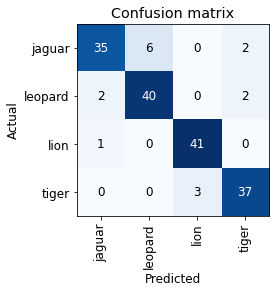

In [18]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

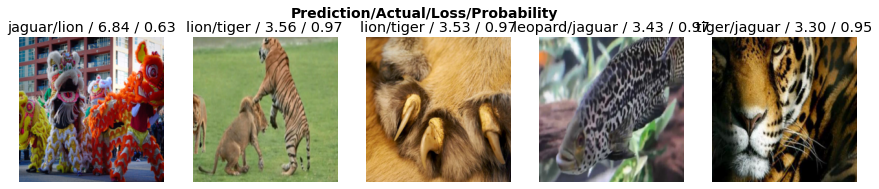

In [19]:
interp.plot_top_losses(5, nrows=1)

In [20]:
learner.predict('images/jaguar.jpg')

('jaguar', tensor(0), tensor([9.7446e-01, 2.5412e-02, 2.1081e-05, 1.0652e-04]))